In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
import tensorflow as tf

hello = tf.constant('Hello, TensorFlow!!!')
# 텐서플로 상수 선언

sess = tf.Session() # 코드를 실행하기 위해 세션 생성
print(sess.run(hello))  # 코드를 실행 후 결과 출력b

b'Hello, TensorFlow!!!'


In [ ]:
# 텐서플로 간단 예제 #2
# 텐서플로 간단 예제 #2
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
# 케라스의 MNIST 데이터 셋 다운로드하기
# 이미지는 numpy 배열형으로 저장
# 0 ~ 9 까지 숫자이미지 저장
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

In [ ]:
# 신경망 생성
# 층layer : 데이터 처리 필터
# 데이터들이 입력되면 다음 단계에서 처리하기 용이하도록
# 유용한 형태로 변환
# 주어진 입력데이터들에서 더 의미있는 표현을 추출해 냄
# 데이터 정재 필터가 여러 개 있는 여과기와 같음
network = models.Sequential()
network.add(layers.Dense(512, activation='relu',
            input_shape=(28*28,)))  # 입력층 (784->512)
network.add(layers.Dense(10, activation='softmax'))
                                    # 출력층 (512->10)

In [ ]:
# 신경망 분석시 중요 요소 3가지
# 손실함수      : 신경망의 성능을 측정하는 지표
# 옵티마이저    : 손실함수를 기반으로 신경망 개선
# 측정지표      : 훈련과 검증 과정을 통해 정확도 측정
network.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

In [ ]:
# 전처리 #1 :  단일색상으로 변환
Xtrain = Xtrain.reshape((60000, 28*28))
Xtrain = Xtrain.astype('float32') / 255

Xtest = Xtest.reshape((10000, 28*28))
Xtest = Xtest.astype('float32') / 255

In [ ]:
# 전처리 #2 :  범주형으로 변환 - 웟핫인코딩
from tensorflow.keras.utils import to_categorical

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [ ]:
# 신경망에 입력데이터 훈련
network.fit(Xtrain, ytrain, epochs=5, batch_size=128)

# 검증 데이터로 테스트
test_loss, test_acc = network.evaluate(Xtest, ytest)


# 정확도, 손실 확인
print('정확도', test_acc)
print('손실(오차)정도', test_loss)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0078 - acc: 0.9977
Epoch 2/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0059 - acc: 0.9983
Epoch 3/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0047 - acc: 0.9987
Epoch 4/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0035 - acc: 0.9991
Epoch 5/5
10000/10000 [==============================] - 0s 42us/sample - loss: 0.0839 - acc: 0.9819
정확도 0.9819
손실(오차)정도 0.08391407670892809


### epochs : 데이터 전체를 이용해서 훈련시킬 횟수
### batch_size : 한번에 처리하는 데이터 수

In [ ]:
# ex) 전체 2000 개의 데이터가 있고, 
       epochs = 20, batch_size = 500일때 총 반복횟수는?

# 계산 - 2000/ 500 = 4 곱하기 20 하면 80이 나오겠죠? 이런 식으로 계산하면 된다는 겁니다.

# mNIST 예제의 총 반복횟수는? (6000)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# 동일한 결과출력을 위해 난수 설정
seed = 190118
np.random.seed(seed)
tf.set_random_seed(seed)

In [ ]:
# 당뇨병 데이터 읽어오기 (x, y)
data = pd.read_csv('pima-indian.csv', header=None)
x = data.iloc[:, 0:8]
y = data.iloc[:, 8]

In [ ]:
print(x.head(), y.head())

          0        1      2          3        4     5         6    7
0  pregnant  glucose  blood  thickness  insulin   bmi  pedigree  age
1         6      148     72         35        0  33.6     0.627   50
2         1       85     66         29        0  26.6     0.351   31
3         8      183     64          0        0  23.3     0.672   32
4         1       89     66         23       94  28.1     0.167   21 0    diabete
1          1
2          0
3          1
4          0
Name: 8, dtype: object


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
model = Sequential()

# 손실함수, 매개변수 최적화 정의

model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
# 훈련
model.fit(x, y, epochs=1000)


print(model.evaluate(x,y)[1])

ValueError: ignored

In [ ]:
# 예측하기
# 3,173,82,48,465,38.4,2.137,25, 1

new_one = np.array([[3,173,82,48,465,38.4,2.137,25]])
y_predict = model.predict(new_one)
print(y_predict)     # [[0.952982]]

InvalidArgumentError: ignored

(1.0, 9.0, 75.0, 100.0)

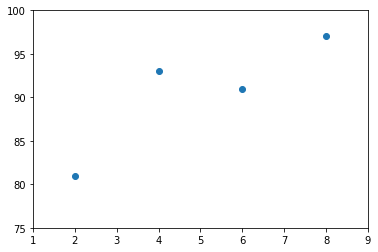

In [ ]:
# 공부시간과 성적에 대한 상관/회귀 분석
x = [2,4,6,8]
y = [81,93,91,97]

import numpy as np
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.axis([1,9,75,100]) 

In [ ]:
# 텐서플로와 경사하강법을 이용한 선형회귀 예제

# x, y 데이터 설정
data = [[2,81],[4,93],[6,91],[8,97]]    # 2차원 텐서 정의
x_data = [x[0] for x in data]
y_data = [x[1] for x in data]

# 기울기 a와 절편 b는 임의의 범위로 설정
# 기울기는 0~10, 절편은 0~100으로 설정
import tensorflow as tf
a = tf.Variable(tf.random_uniform([1], 0, 10,
                dtype=tf.float64, seed=1))
b = tf.Variable(tf.random_uniform([1], 0, 100,
                dtype=tf.float64, seed=1))

In [ ]:
# 선형회귀식 정의
y = a * x_data + b


# 텐서플로에서 제공하는 평균제곱근 함수 사용
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))

In [ ]:
# 학습률 정의
learn_rate = 0.1

# RMSE를 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer\
              (learn_rate).minimize(rmse)

# 텐서플로로 학습 시도
with tf.Session() as sess:
    # 텐서플로 변수 초기화
    sess.run(tf.global_variables_initializer())
    # 학습횟수만큼 훈련 - 적절한 기울기 찾음
    # 총 학습횟수는 2000, 10회때마다 진행상황 출력
    for step in range(2001):
        sess.run(gradient_decent)
        if step % 100 == 0:
            print('훈련횟수 epoch %.f, RMSE %.3f,'\
            '기울기 %.3f, 절편 %.3f, 경사하강법 %s' %
                  ( step, sess.run(rmse),
                    sess.run(a), sess.run(b),
                    sess.run(gradient_decent) ))

훈련횟수 epoch 0, RMSE 76.212,기울기 1.291, 절편 7.921, 경사하강법 None
훈련횟수 epoch 100, RMSE 26.850,기울기 13.256, 절편 13.616, 경사하강법 None
훈련횟수 epoch 200, RMSE 25.232,기울기 12.588, 절편 17.603, 경사하강법 None
훈련횟수 epoch 300, RMSE 23.617,기울기 11.921, 절편 21.586, 경사하강법 None
훈련횟수 epoch 400, RMSE 22.006,기울기 11.254, 절편 25.565, 경사하강법 None
훈련횟수 epoch 500, RMSE 20.399,기울기 10.588, 절편 29.538, 경사하강법 None
훈련횟수 epoch 600, RMSE 18.796,기울기 9.924, 절편 33.506, 경사하강법 None
훈련횟수 epoch 700, RMSE 17.201,기울기 9.260, 절편 37.465, 경사하강법 None
훈련횟수 epoch 800, RMSE 15.614,기울기 8.598, 절편 41.413, 경사하강법 None
훈련횟수 epoch 900, RMSE 14.038,기울기 7.939, 절편 45.348, 경사하강법 None
훈련횟수 epoch 1000, RMSE 12.478,기울기 7.283, 절편 49.263, 경사하강법 None
훈련횟수 epoch 1100, RMSE 10.940,기울기 6.632, 절편 53.150, 경사하강법 None
훈련횟수 epoch 1200, RMSE 9.434,기울기 5.987, 절편 56.996, 경사하강법 None
훈련횟수 epoch 1300, RMSE 7.977,기울기 5.353, 절편 60.780, 경사하강법 None
훈련횟수 epoch 1400, RMSE 6.598,기울기 4.736, 절편 64.461, 경사하강법 None
훈련횟수 epoch 1500, RMSE 5.347,기울기 4.149, 절편 67.966, 경사하강법 None
훈련횟수 epoch 1600, RMS

## step 횟수를 100으로 늘리니까 최종 결과값은 2.476, 절편 77,951이 나옴.
## 텐서플로로 쓸땐 요렇게 쓰고요.

### 경사하강법 적용시 고려사항
### 학습률 : 기울기의 부호를 바뀌 이동시킬때
### 적절한 거리를 찾지 못해 너무 멀리 이동시키면
### 중심점을 지나칠수도 있음
### 따라서, 어느 만큼 이동시킬지 신중히 결정해야 함
### 케라스는 자동으로 이동거리를 조절해 줌

In [ ]:
xtrain = [2,4,6,8]
ytrain = [81,93,91,97]


model = Sequential()
model.add(Dense(1, input_dim=1))


# 비용계산 함수 : rmse
model.compile(loss='mse', optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
# 2500회의 학습 시행, 진행상황 표시
model.fit(xtrain, ytrain, epochs=2500, verbose=1)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 1/2500
4/4 [==============================] - 0s 7ms/sample - loss: 6811.5278 - acc: 0.0000e+00
Epoch 2/2500
4/4 [==============================] - 0s 369us/sample - loss: 1838.4039 - acc: 0.0000e+00
Epoch 3/2500
4/4 [==============================] - 0s 871us/sample - loss: 1102.5966 - acc: 0.0000e+00
Epoch 4/2500
4/4 [==============================] - 0s 362us/sample - loss: 989.1796 - acc: 0.0000e+00
Epoch 5/2500
4/4 [==============================] - 0s 450us/sample - loss: 967.2109 - acc: 0.0000e+00
Epoch 6/2500
4/4 [==============================] - 0s 433us/sample - loss: 958.7081 - acc: 0.0000e+00
Epoch 7/2500
4/4 [==============================] - 0s 340us/sample - loss: 952.2174 - acc: 0.0000e+00
Epoch 8/2500
4/4 [==============================] - 0s 348us/sample - loss: 946.0560 - acc: 0.0000e+00
Epoch 9/2500
4/4 [==============================] - 0s 937us/sample - loss: 939.9767 - acc: 0.0000e+00
Epoch 10/2500
4/4 [=================

In [ ]:
# 결과 출력
print('기울기 %.3f' % model.get_weights()[0])
print('절편 %.3f' % model.get_weights()[1])

기울기 2.304
절편 78.977


In [ ]:
# 예측하기
ypredict = model.predict(np.array([55]))
print('55시간 공부하면 성적은', ypredict)

ypredict = model.predict(np.array([10]))
print('10시간 공부하면 성적은', ypredict)

55시간 공부하면 성적은 [[205.68777]]
10시간 공부하면 성적은 [[102.01544]]


### 손실함수loss function
### 비용cost함수라고도 함
### 신경망이 잘 학습하고 있는지를 나타내주는 지표
### 손실loss,비용cost은 출력값과 실제값 사이의 오차를 의미
### 신경망에서는 이것들이 최소화되도록 하는 과정이 학습임
### 따라서, 손실이 최소화된다는 것은 학습이 잘되고 있음을 의미

### 딥러닝에서 손실함수는 평균제곱오차MSE(회귀)와
### 교차엔트로피오차CEE(분류)를 사용함

### 학습 최적화 방법
### 텐서플로에서는 optimizer로 설정

### 경사하강법SGD - 확률적 경사하강법 : 무작위 값을 대입

### 모멘텀        - SGD + 무작위값에 탄성을 부여 (정확도 개선)

### 아다그라드adagrad - 학습률에 탄성을 부여 (보폭크기 개선)
###                     무작위값 대입 횟수를 조절

### RMSprop - adagrad의 보폭 민감도를 개선 (보폭크기 개선)

### Adam - 무작위값에 탄성부여, 학습률에도 탄성 부여
###          즉, 정확도 개선 + 보폭크기 개선
###       keras.optimizer.Adam(lr=0.0001,
###               beta_1=0.9, beta_2=0.9999,
#               elpsilon=1e-08, decay=0.0)